<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/AnaAlonso_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance --upgrade --no-cache-dir

In [2]:
pip install docplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docplex: filename=docplex-2.27.239-py3-none-any.whl size=674503 sha256=444d9f1bd3bf12a63153f2147b527882cb239b3b22cb75facee92bda3bc04005
  Stored in directory: /root/.cache/pip/wheels/62/7c/db/cef9425e1cedbf45621545097eaaeed5efe07005bd8229dd74
Successfully built docplex


In [3]:
pip install CPLEX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 12.7 MB/s eta 0:00:00


Github: yfinance

In [4]:
!pip install pytickersymbols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.43.0
    Uninstalling wheel-0.43.0:
      Successfully uninstalled wheel-0.43.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1


In [5]:
pip install qiskit_optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.2 MB/s eta 0:00:00


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import seaborn as sns
import csv
import yfinance as yf

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

Nos vamos a fjar en el valor de cerrado (Close) para analizar las gráficas.

[*********************100%%**********************]  27 of 27 completed


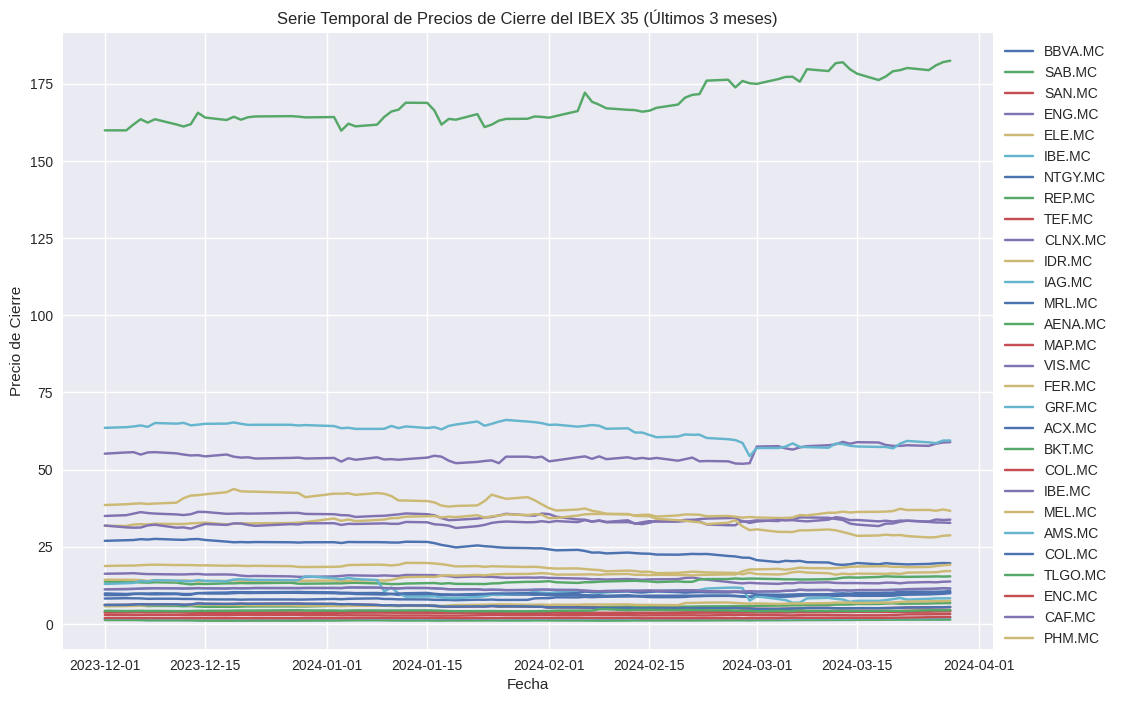

In [7]:
# Lista de símbolos de las acciones del IBEX35
ibex35_symbols = ['BBVA.MC', 'SAB.MC', 'SAN.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC',
                  'NTGY.MC', 'REP.MC', 'TEF.MC', 'CLNX.MC', 'IDR.MC', 'IAG.MC',
                  'MRL.MC', 'AENA.MC', 'MAP.MC', 'VIS.MC', 'FER.MC', 'GRF.MC',
                  'ACX.MC', 'BKT.MC', 'COL.MC', 'IBE.MC', 'MEL.MC', 'AMS.MC',
                  'COL.MC', 'TLGO.MC', 'ENC.MC', 'CAF.MC', 'PHM.MC']

# Fecha de inicio y fin (últimos 3 meses)
end_date = datetime.today() - timedelta(days=30)
start_date = end_date - timedelta(days=120)

# Descargar datos desde Yahoo Finance
ibex35_data = yf.download(ibex35_symbols, start=start_date, end=end_date)['Adj Close']

# Graficar la serie temporal de los precios de cierre
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(ibex35_data.index, ibex35_data[symbol], label=symbol)

plt.title('Serie Temporal de Precios de Cierre del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

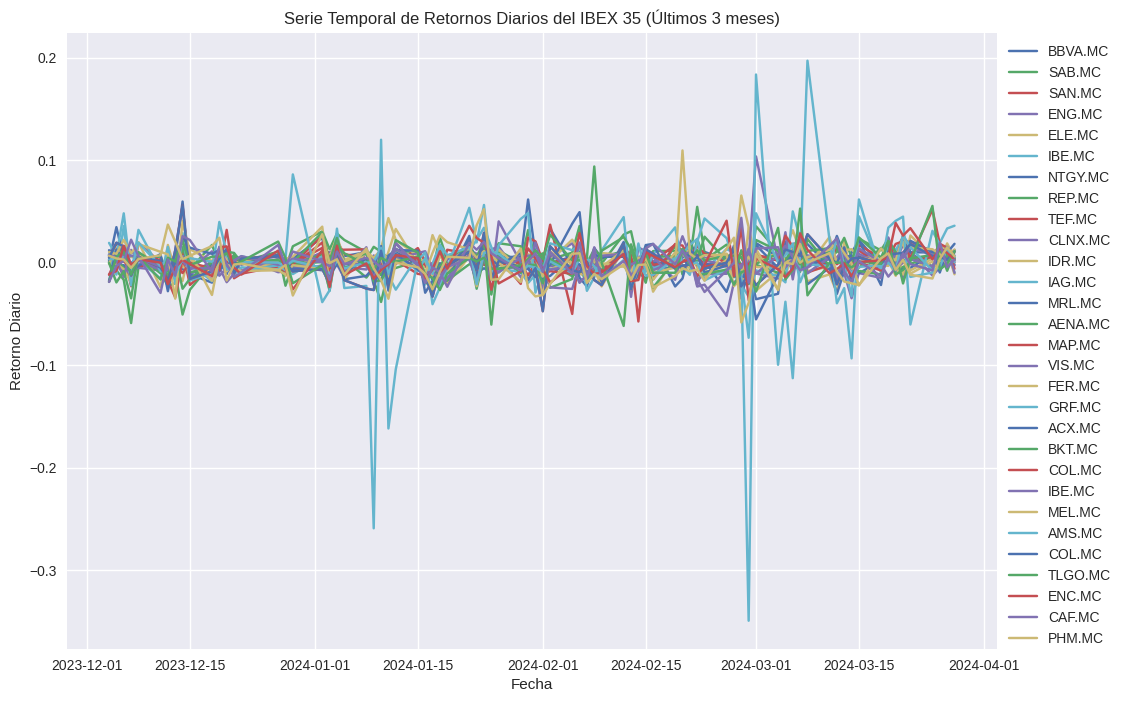

In [8]:
# Calcular los retornos diarios
returns = ibex35_data.pct_change()

# Graficar la serie temporal de los retornos
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.title('Serie Temporal de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

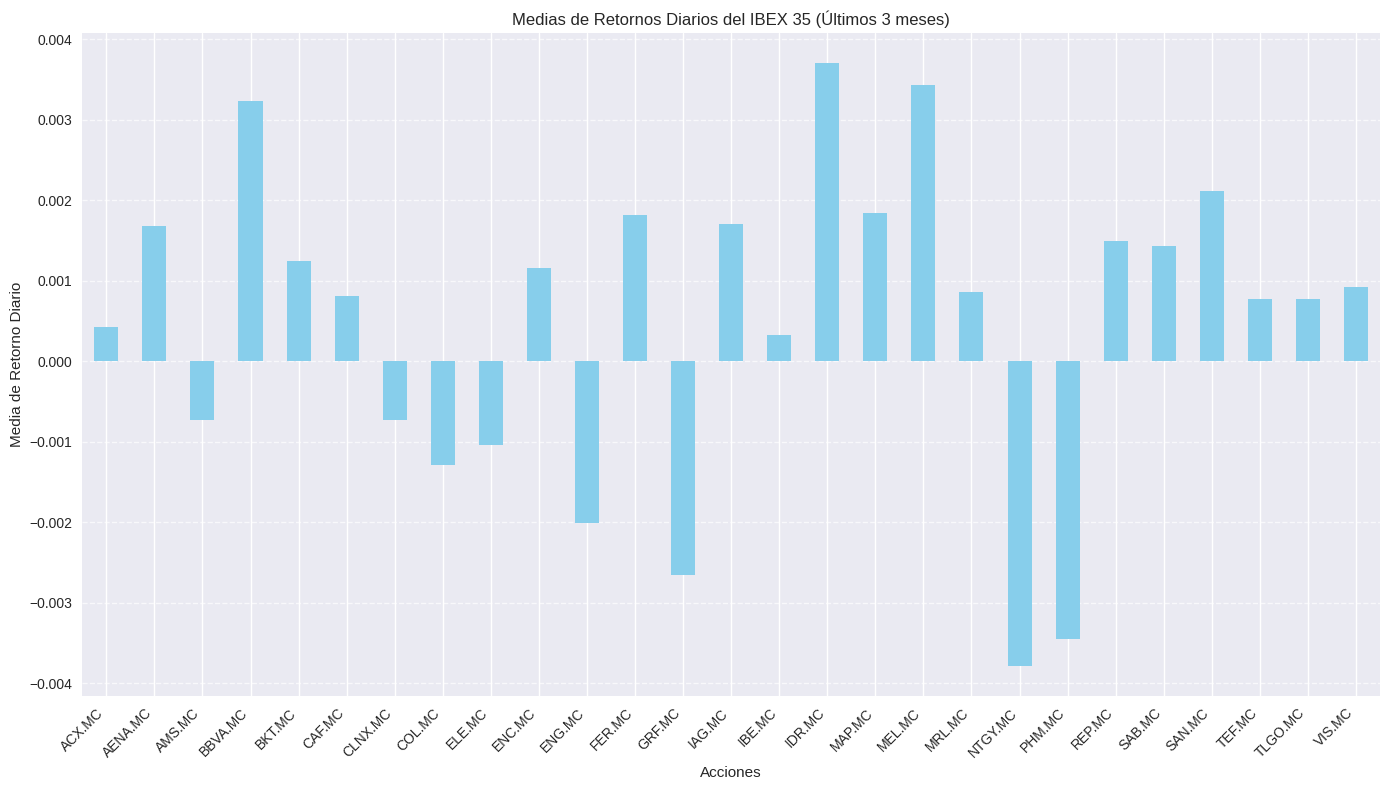

In [9]:
# Calcular la media de los retornos
mean_returns = returns.mean()

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos tanto la media como la varianza en el mismo gráfico de barras.

<Figure size 1400x800 with 0 Axes>

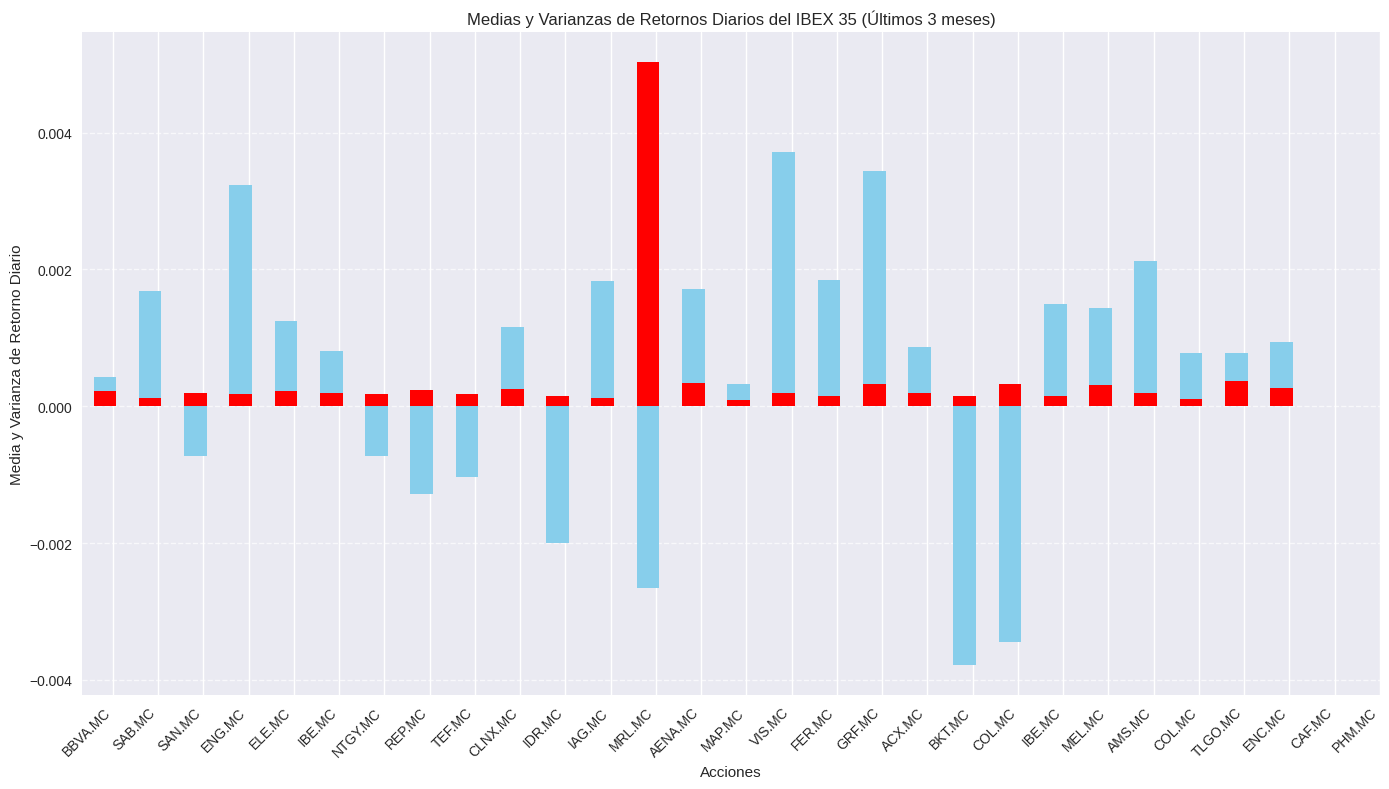

In [10]:
variance_returns = returns.var()

# Graficar el diagrama de barras de las medias y varianzas de los retornos
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ibex35_symbols))

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

variance_returns.plot(kind='bar', color='red')
plt.title('Medias y Varianzas de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(index + bar_width / 2, ibex35_symbols, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nos interesan aquellas acciones con una media alta y con poda varianza.

A continuación, vemos la misma gráfica pero la varianza en línea.

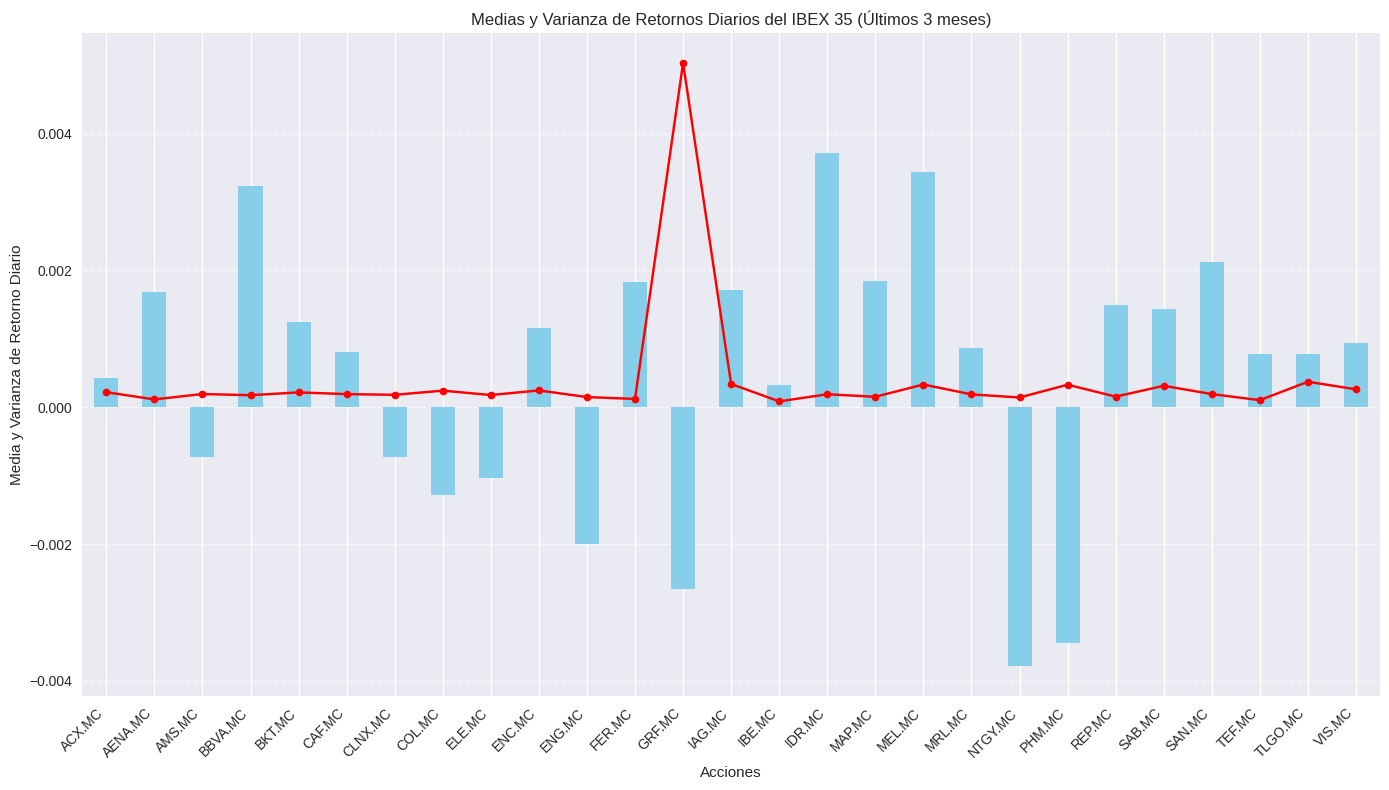

In [11]:
# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias y Varianza de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.plot(variance_returns, color = 'red', marker = '.', markeredgewidth = 2)

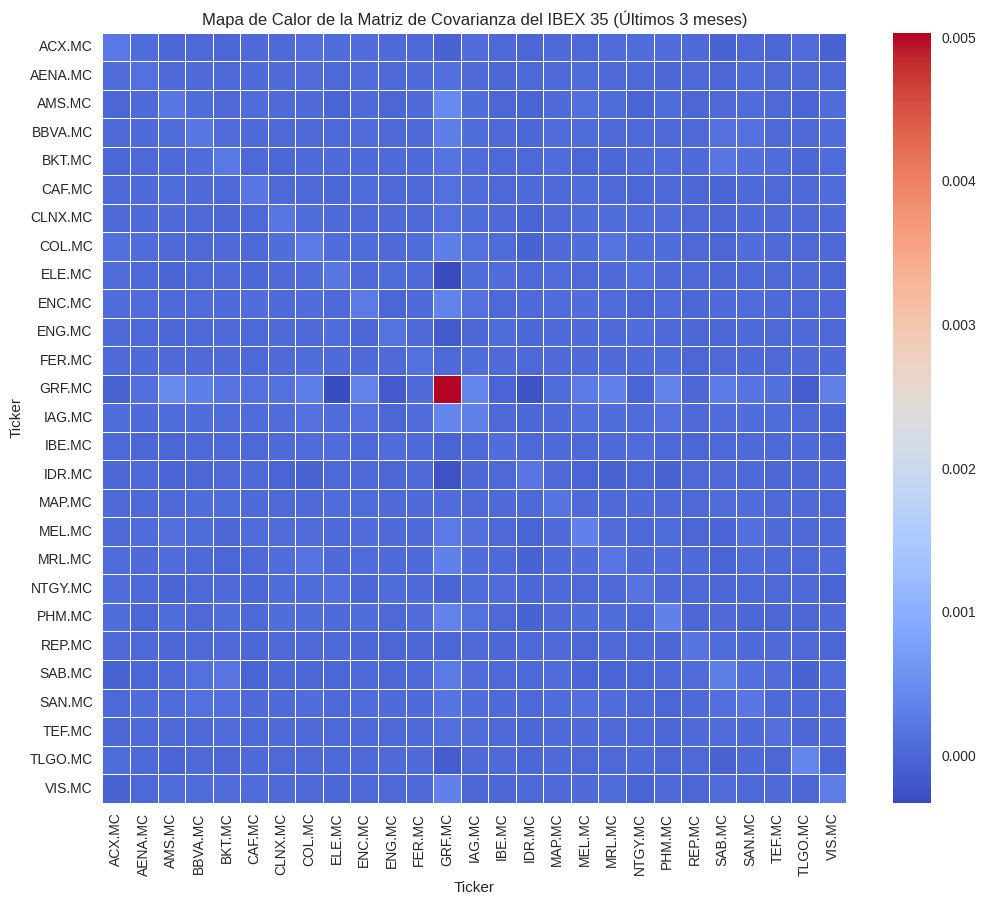

In [12]:
# Calcular la matriz de covarianza
covariance_matrix = returns.cov()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Covarianza del IBEX 35 (Últimos 3 meses)')
plt.show()

In [ ]:
# Factor de inversión al riesgo: 0 < q < 1
q = 0.5

from itertools import combinations
vector = [0] * 27
# vector = [0] * 6
combinations_list = list(combinations(range(27), 5))
# combinations_list = list(combinations(range(6), 2))
results_dict = {}

for comb in combinations_list:
  new_vector = vector.copy()
  for index in comb:
    new_vector[index] = 1
    # print(new_vector)
  result_positions = []

  for index in comb:
    new_vector[index] = 1
  result_positions.append([i for i, x in enumerate(new_vector) if x == 1])
  # print(result_positions)

  primer_sumatorio = 0
  segundo_sumatorio = 0

  for i in range(27):
  # for i in range(6):
    primer_sumatorio = primer_sumatorio + new_vector[i]*mean_returns[i]
    for j in range(27):
    # for j in range(6):
      segundo_sumatorio = segundo_sumatorio + new_vector[i]*covariance_matrix.iloc[i,j]*new_vector[j]
  function = primer_sumatorio - q*segundo_sumatorio
  # Save results
  results_dict[comb] = (new_vector, function)

# # Print results dictionary
# for comb, (new_vector, function) in results_dict.items():
#     print(f"Combination: {comb}, New Vector: {new_vector}, Function Result: {function}")

KeyboardInterrupt: 

In [ ]:
max_value = float('-inf')  # Inicializar con un valor muy pequeño
max_index = None
for comb, (new_vector, function) in results_dict.items():
    if function > max_value:
        max_value = function
        max_index = comb

print("Maximum Function Value:", max_value)
print("Index of Maximum Function Value:", max_index)

NameError: name 'results_dict' is not defined

In [ ]:
print('La mejor combinación de acciones para invertir es:')
for index in max_index:
  print(ibex35_symbols[index])

La mejor combinación de acciones para invertir es:
ENG.MC
ACX.MC
COL.MC
MEL.MC
AMS.MC


In [13]:
from docplex.mp.model import Model

In [14]:
# Prepare problem instances
# n = 27
n = 6
q = 0.5
# budget = 5
budget = 2

In [15]:
# Create docplex model
mdl = Model("a")
x = mdl.binary_var_list(range(n), name = "x")
objective = mdl.sum([mean_returns[i]*x[i] for i in range(n)])
objective -= q*mdl.sum([covariance_matrix.iloc[i,j] * x[i] * x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) <= budget)

docplex.mp.LinearConstraint[](x_0+x_1+x_2+x_3+x_4+x_5,LE,2)

In [16]:
print(mdl.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: a

Maximize
 obj: 0.000428499273 x_0 + 0.001686391831 x_1 - 0.000726811069 x_2
      + 0.003237360342 x_3 + 0.001245667999 x_4 + 0.000808609268 x_5 + [
      - 0.000218773611 x_0^2 - 0.000096439807 x_0*x_1 + 0.000026785422 x_0*x_2
      - 0.000030227462 x_0*x_3 - 0.000001002572 x_0*x_4 - 0.000086577314 x_0*x_5
      - 0.000114173562 x_1^2 - 0.000074262261 x_1*x_2 - 0.000073478712 x_1*x_3
      - 0.000033886347 x_1*x_4 - 0.000092686349 x_1*x_5 - 0.000192615721 x_2^2
      - 0.000107647052 x_2*x_3 - 0.000035446646 x_2*x_4 - 0.000109535559 x_2*x_5
      - 0.000175595558 x_3^2 - 0.000170132019 x_3*x_4 - 0.000059352961 x_3*x_5
      - 0.000216403786 x_4^2 - 0.000021397961 x_4*x_5 - 0.000191091574 x_5^2 ]/2
Subject To
 c1: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 <= 2

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1
 0 <= x_5 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4 x_5
End



In [17]:
sol = mdl.solve()
mdl.print_solution()

objective: 0.005
status: OPTIMAL_SOLUTION(2)
  x_1=1
  x_3=1


In [18]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators.docplex_mp import from_docplex_mp

In [19]:
# load from a Docplex model
mod = from_docplex_mp(mdl)
print(type(mod))
print()
print(mod.prettyprint())

<class 'qiskit_optimization.problems.quadratic_program.QuadraticProgram'>

Problem name: a

Maximize
  -0.00010938680546115879*x_0^2 - 4.82199036417274e-05*x_0*x_1
  + 1.33927107927522e-05*x_0*x_2 - 1.511373091663077e-05*x_0*x_3
  - 5.012858782272934e-07*x_0*x_4 - 4.3288657012876466e-05*x_0*x_5
  - 5.708678087656246e-05*x_1^2 - 3.713113033368044e-05*x_1*x_2
  - 3.673935588580827e-05*x_1*x_3 - 1.6943173332948343e-05*x_1*x_4
  - 4.634317449339749e-05*x_1*x_5 - 9.630786071289417e-05*x_2^2
  - 5.382352582301356e-05*x_2*x_3 - 1.772332288765287e-05*x_2*x_4
  - 5.4767779326334314e-05*x_2*x_5 - 8.77977791665536e-05*x_3^2
  - 8.506600957003491e-05*x_3*x_4 - 2.967648063241384e-05*x_3*x_5
  - 0.00010820189299660928*x_4^2 - 1.0698980375955766e-05*x_4*x_5
  - 9.554578716050805e-05*x_5^2 + 0.00042849927338836256*x_0
  + 0.0016863918305678007*x_1 - 0.0007268110686099874*x_2
  + 0.003237360342416035*x_3 + 0.0012456679987591286*x_4
  + 0.0008086092684380351*x_5

Subject to
  Linear constraints (1)
    

In [20]:
from qiskit_optimization.converters import InequalityToEquality

In [21]:
ineq2eq = InequalityToEquality()
qp_eq = ineq2eq.convert(mod)
print(qp_eq.prettyprint())

Problem name: a

Maximize
  -0.00010938680546115879*x_0^2 - 4.82199036417274e-05*x_0*x_1
  + 1.33927107927522e-05*x_0*x_2 - 1.511373091663077e-05*x_0*x_3
  - 5.012858782272934e-07*x_0*x_4 - 4.3288657012876466e-05*x_0*x_5
  - 5.708678087656246e-05*x_1^2 - 3.713113033368044e-05*x_1*x_2
  - 3.673935588580827e-05*x_1*x_3 - 1.6943173332948343e-05*x_1*x_4
  - 4.634317449339749e-05*x_1*x_5 - 9.630786071289417e-05*x_2^2
  - 5.382352582301356e-05*x_2*x_3 - 1.772332288765287e-05*x_2*x_4
  - 5.4767779326334314e-05*x_2*x_5 - 8.77977791665536e-05*x_3^2
  - 8.506600957003491e-05*x_3*x_4 - 2.967648063241384e-05*x_3*x_5
  - 0.00010820189299660928*x_4^2 - 1.0698980375955766e-05*x_4*x_5
  - 9.554578716050805e-05*x_5^2 + 0.00042849927338836256*x_0
  + 0.0016863918305678007*x_1 - 0.0007268110686099874*x_2
  + 0.003237360342416035*x_3 + 0.0012456679987591286*x_4
  + 0.0008086092684380351*x_5

Subject to
  Linear constraints (1)
    c0@int_slack + x_0 + x_1 + x_2 + x_3 + x_4 + x_5 == 2  'c0'

  Integer vari

In [22]:
from qiskit_optimization.converters import IntegerToBinary

In [23]:
int2bin = IntegerToBinary()
qp_eq_bin = int2bin.convert(qp_eq)
print(qp_eq_bin.prettyprint())

Problem name: a

Maximize
  -0.00010938680546115879*x_0^2 - 4.82199036417274e-05*x_0*x_1
  + 1.33927107927522e-05*x_0*x_2 - 1.511373091663077e-05*x_0*x_3
  - 5.012858782272934e-07*x_0*x_4 - 4.3288657012876466e-05*x_0*x_5
  - 5.708678087656246e-05*x_1^2 - 3.713113033368044e-05*x_1*x_2
  - 3.673935588580827e-05*x_1*x_3 - 1.6943173332948343e-05*x_1*x_4
  - 4.634317449339749e-05*x_1*x_5 - 9.630786071289417e-05*x_2^2
  - 5.382352582301356e-05*x_2*x_3 - 1.772332288765287e-05*x_2*x_4
  - 5.4767779326334314e-05*x_2*x_5 - 8.77977791665536e-05*x_3^2
  - 8.506600957003491e-05*x_3*x_4 - 2.967648063241384e-05*x_3*x_5
  - 0.00010820189299660928*x_4^2 - 1.0698980375955766e-05*x_4*x_5
  - 9.554578716050805e-05*x_5^2 + 0.00042849927338836256*x_0
  + 0.0016863918305678007*x_1 - 0.0007268110686099874*x_2
  + 0.003237360342416035*x_3 + 0.0012456679987591286*x_4
  + 0.0008086092684380351*x_5

Subject to
  Linear constraints (1)
    c0@int_slack@0 + c0@int_slack@1 + x_0 + x_1 + x_2 + x_3 + x_4 + x_5
    == 

In [24]:
from qiskit_optimization.converters import LinearEqualityToPenalty

In [25]:
lineq2penalty = LinearEqualityToPenalty()
qubo = lineq2penalty.convert(qp_eq_bin)
print(qubo.prettyprint())

Problem name: a

Maximize
  -1.0091970959094572*c0@int_slack@0^2
  - 2.0183941918189143*c0@int_slack@0*c0@int_slack@1
  - 1.0091970959094572*c0@int_slack@1^2 - 2.0183941918189143*x_0*c0@int_slack@0
  - 2.0183941918189143*x_0*c0@int_slack@1 - 1.0093064827149183*x_0^2
  - 2.018442411722556*x_0*x_1 - 2.0183807991081215*x_0*x_2
  - 2.018409305549831*x_0*x_3 - 2.0183946931047925*x_0*x_4
  - 2.018437480475927*x_0*x_5 - 2.0183941918189143*x_1*c0@int_slack@0
  - 2.0183941918189143*x_1*c0@int_slack@1 - 1.0092541826903336*x_1^2
  - 2.0184313229492483*x_1*x_2 - 2.0184309311748*x_1*x_3
  - 2.018411134992247*x_1*x_4 - 2.018440534993408*x_1*x_5
  - 2.0183941918189143*x_2*c0@int_slack@0
  - 2.0183941918189143*x_2*c0@int_slack@1 - 1.00929340377017*x_2^2
  - 2.0184480153447373*x_2*x_3 - 2.018411915141802*x_2*x_4
  - 2.0184489595982407*x_2*x_5 - 2.0183941918189143*x_3*c0@int_slack@0
  - 2.0183941918189143*x_3*c0@int_slack@1 - 1.0092848936886236*x_3^2
  - 2.0184792578284845*x_3*x_4 - 2.018423868299547*x_

https://qiskit-community.github.io/qiskit-optimization/tutorials/03_minimum_eigen_optimizer.html

In [26]:
from qiskit_optimization.translators import to_ising

In [27]:
# convert to Ising Hamiltonian
H, offset = qubo.to_ising()

# The offset number multiplies everything (factor común)
print("offset: {}".format(offset))
print("operator:")
print(H)

offset: 6.052240541037281
operator:
SparsePauliOp(['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII', 'IIIIZIII', 'IIIZIIII', 'IIZIIIII', 'IZIIIIII', 'ZIIIIIII', 'IIIIIIZZ', 'IIIIIZIZ', 'IIIIZIIZ', 'IIIZIIIZ', 'IIZIIIIZ', 'IZIIIIIZ', 'ZIIIIIIZ', 'IIIIIZZI', 'IIIIZIZI', 'IIIZIIZI', 'IIZIIIZI', 'IZIIIIZI', 'ZIIIIIZI', 'IIIIZZII', 'IIIZIZII', 'IIZIIZII', 'IZIIIZII', 'ZIIIIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IIZZIIII', 'IZIZIIII', 'ZIIZIIII', 'IZZIIIII', 'ZIZIIIII', 'ZZIIIIII'],
              coeffs=[-2.01825807+0.j, -2.01762588+0.j, -2.01884326+0.j, -2.01687452+0.j,
 -2.01785819+0.j, -2.01808385+0.j, -2.01839419+0.j, -2.01839419+0.j,
  0.5046106 +0.j,  0.5045952 +0.j,  0.50460233+0.j,  0.50459867+0.j,
  0.50460937+0.j,  0.50459855+0.j,  0.50459855+0.j,  0.50460783+0.j,
  0.50460773+0.j,  0.50460278+0.j,  0.50461013+0.j,  0.50459855+0.j,
  0.50459855+0.j,  0.504612  +0.j,  0.50460298+0.j,  0.50461224+0.j,
  0.50459855+0.j,  0.50459855+0.j,  0.50461981+0.j,  0.50460597+0.j,
  0.50459855

In [28]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer

exact_mes = NumPyMinimumEigensolver()
exact = MinimumEigenOptimizer(exact_mes)
exact_result = exact.solve(qubo)
print(exact_result.prettyprint())

objective function value: 0.0047421282570550005
variable values: x_0=0.0, x_1=1.0, x_2=0.0, x_3=1.0, x_4=0.0, x_5=0.0, c0@int_slack@0=0.0, c0@int_slack@1=0.0
status: SUCCESS


In [40]:
from qiskit.circuit.library import RealAmplitudes
from qiskit import QuantumCircuit

ansatz = RealAmplitudes(8, entanglement='circular', reps=2, insert_barriers=True)
qc = QuantumCircuit(8)  # create a circuit and append the RY variational form
qc.compose(ansatz, inplace=True)
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
«     ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_1: ┤1                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_2: ┤2                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_3: ┤3                                                                                                                                                       ├
«     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23]) │
«q_4: ┤4                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_5: ┤5                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_6: ┤6                                                                                                                                                       ├
«     │                                                                                                                                                        │
«q_7: ┤7                                                                                                                                                       ├
«     └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [30]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 24.6 MB/s eta 0:00:00


In [41]:
from qiskit_aer import AerSimulator

backend = AerSimulator()

In [42]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ansatz_isa = pm.run(ansatz)

In [43]:
hamiltonian_isa = H.apply_layout(layout=ansatz_isa.layout)

In [44]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    return energy

In [38]:
pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.3 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.6-py3-none-any.whl size=340124 sha256=6a9399490560d04056fb7db7c05fb434f44f030e41d9f072c55a6deecb0cdc4d
  Stored in directory: /root/.cache/pip/wheels/84/ea/c4/db9cbf7a0503ed556412eb1082a1cfdb67e030ef592bab7a29
  Created wheel for ibm-cloud-sdk

In [45]:
# runtime imports
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# SciPy minimizer routine
from scipy.optimize import minimize

num_params = ansatz_isa.num_parameters
x0 = 2 * np.pi * np.random.random(num_params)

# To run on local simulator:
#   1. Use the Estimator from qiskit.primitives instead.
#   2. Remove the Session context manager below.
with Session(backend=backend) as session:
    estimator = Estimator(session=session)
    estimator.options.default_shots = 10_000

    res = minimize(
        cost_func,
        x0,
        args=(ansatz_isa, hamiltonian_isa, estimator),
        method="cobyla")

In [47]:
res.x

array([3.13876631, 4.19259346, 4.76648015, 4.04531991, 6.30393665,
       0.63578527, 2.13350987, 6.87488067, 1.60605313, 3.82295374,
       5.86913448, 1.34754147, 1.54305573, 2.76000641, 4.64469267,
       4.80594927, 5.21187922, 1.05993003, 3.95203537, 4.95616049,
       4.50560815, 2.17578733, 1.59805337, 5.50396948])

In [65]:
parameters = ansatz_isa.assign_parameters(res.x)
parameters.measure_all()
print(parameters)

         ┌────────────┐  ░ ┌───┐                                    ░ »
   q_0: ─┤ Ry(3.1925) ├──░─┤ X ├──■─────────────────────────────────░─»
         ├────────────┤  ░ └─┬─┘┌─┴─┐                               ░ »
   q_1: ─┤ Ry(3.7919) ├──░───┼──┤ X ├──■────────────────────────────░─»
         ├────────────┤  ░   │  └───┘┌─┴─┐                          ░ »
   q_2: ─┤ Ry(4.4473) ├──░───┼───────┤ X ├──■───────────────────────░─»
         ├────────────┤  ░   │       └───┘┌─┴─┐                     ░ »
   q_3: ─┤ Ry(3.1417) ├──░───┼────────────┤ X ├──■──────────────────░─»
         ├────────────┤  ░   │            └───┘┌─┴─┐                ░ »
   q_4: ─┤ Ry(6.3888) ├──░───┼─────────────────┤ X ├──■─────────────░─»
        ┌┴────────────┴┐ ░   │                 └───┘┌─┴─┐           ░ »
   q_5: ┤ Ry(-0.25206) ├─░───┼──────────────────────┤ X ├──■────────░─»
        └┬────────────┬┘ ░   │                      └───┘┌─┴─┐      ░ »
   q_6: ─┤ Ry(2.1178) ├──░───┼───────────────────────────┤ X ├──

In [67]:
job = backend.run(parameters, shots = 5000).result()

In [69]:
data = job.get_counts(parameters)

In [70]:
print(data)

{'10010010': 1, '10010011': 3, '00000100': 2, '10101001': 1, '10101010': 2, '10100011': 3, '01000001': 1, '11010100': 2, '11001010': 1, '11000100': 2, '00011000': 1, '10100110': 1, '10110110': 2, '01100110': 3, '00010000': 2, '10000010': 505, '10111000': 3, '10100000': 516, '00000110': 7, '10011000': 31, '10110000': 38, '10110010': 14, '00100001': 6, '01110011': 2, '11100100': 3, '00111010': 25, '11100000': 22, '10000100': 33, '00100010': 238, '00011110': 1, '10111010': 1, '01110000': 25, '00000010': 246, '00110110': 24, '01110010': 22, '10100001': 1, '10010100': 32, '10000110': 11, '10010000': 556, '00101110': 2, '00111001': 1, '00001010': 6, '10010001': 1, '00110001': 12, '11001000': 2, '10101000': 15, '00110000': 356, '11000000': 12, '10100010': 6, '01100010': 11, '10001010': 13, '11000010': 25, '00101000': 24, '11010000': 43, '10110100': 1, '01110110': 3, '11011100': 1, '10001000': 5, '00000001': 4, '00011010': 4, '00100100': 42, '01000010': 9, '00100000': 1146, '00100110': 34, '01